<a href="https://colab.research.google.com/github/Jorgecardetegit/DiseaseClassifier/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

### Necessary Libs and variables creation

In [ ]:
import os
from glob import glob
import random

import cv2
import matplotlib.pyplot as plt

In [ ]:
gen_dir = "/content/drive/MyDrive/Apple disease proyect/dataset"
categories = os.listdir(gen_dir)
categories = [category.split('___')[1].lower() for category in categories]

apple_scab = glob('/content/drive/MyDrive/Apple disease proyect/dataset/Apple___Apple_scab/*.JPG')
black_rot = glob("/content/drive/MyDrive/Apple disease proyect/dataset/Apple___Black_rot/*.JPG")
cedar_apple_rust = glob("/content/drive/MyDrive/Apple disease proyect/dataset/Apple___Cedar_apple_rust/*.JPG")
healthy = glob("/content/drive/MyDrive/Apple disease proyect/dataset/Apple___healthy/*.JPG")

Variables size

In [ ]:
print(f"Category apple_scab contains: {len(apple_scab)} images.")
print(f"Category black_rot contains: {len(black_rot)} images.")
print(f"Category cedar_apple_rust contains: {len(cedar_apple_rust)} images.")
print(f"Category healthy contains: {len(healthy)} images.")

Category apple_scab contains: 630 images.
Category black_rot contains: 621 images.
Category cedar_apple_rust contains: 275 images.
Category healthy contains: 1645 images.


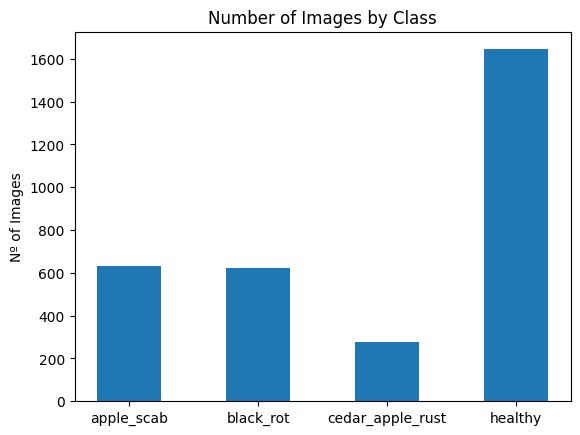

In [ ]:
count_dict = {
    'apple_scab': len(apple_scab),
    'black_rot': len(black_rot),
    'cedar_apple_rust': len(cedar_apple_rust),
    'healthy': len(healthy)
    }

plt.bar(count_dict.keys(), count_dict.values(), width = .5)
plt.title("Number of Images by Class")
plt.ylabel('Nº of Images')
plt.show()


There is a clear imbalance in the number of images in each class. Being cedar_apple_rust the lowest with 275 images and healthy with 1645.

### Verifiction if all the images have the same size

In [ ]:
def check_image_sizes(image_paths):
    first_image_size = None

    for image_path in image_paths:
        img = cv2.imread(image_path)

        if img is not None:
            img_size = img.shape
            if first_image_size is None:
                first_image_size = img_size
            else:
                if img_size != first_image_size:
                    return(f"Las imágenes no tienen el mismo tamaño. {image_path} tiene un tamaño diferente.")
        else:
            return(f"No se pudo cargar la imagen {image_path}")

    if first_image_size is not None:
        return(f"Todas las imágenes tienen el mismo tamaño: {first_image_size}")

In [ ]:
check_image_sizes(apple_scab)
check_image_sizes(black_rot)
check_image_sizes(cedar_apple_rust)
check_image_sizes(healthy)

'Todas las imágenes tienen el mismo tamaño: (256, 256, 3)'

## Visualization of samplings

In [ ]:
def show_random_images(list_paths):
    plt.figure(figsize=(12, 6))
    num_classes = len(list_paths)

    for i, class_paths in enumerate(list_paths):
        random_image_paths = random.sample(class_paths, 7)

        for j, image_path in enumerate(random_image_paths):
            img = cv2.imread(image_path)
            plt.subplot(num_classes, 7, i * 7 + j + 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.axis('off')

    plt.suptitle("Categories comparison")
    plt.tight_layout()
    plt.show()

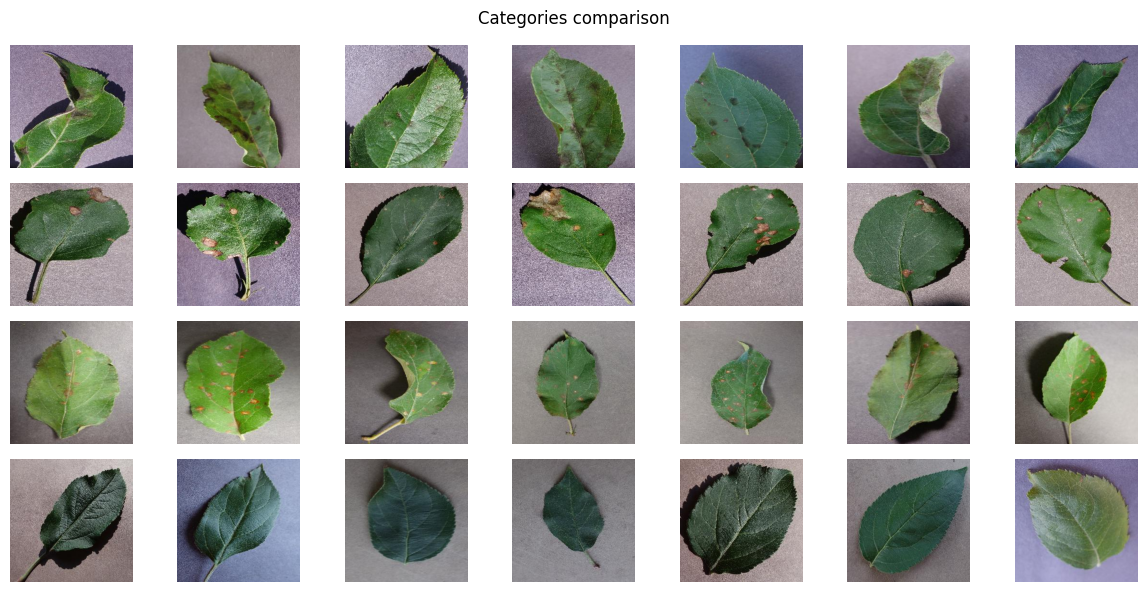

In [ ]:
show_random_images([apple_scab,black_rot,cedar_apple_rust,healthy])